<a href="https://colab.research.google.com/github/mauney/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module4-sequence-your-narrative/LS_DS_224_Sequence_your_narrative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence your narrative

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

## Make a plan

#### How to present the data?

Variables --> Visual Encodings
- Income --> x
- Lifespan --> y
- Region --> color
- Population --> size
- Year --> animation frame (alternative: small multiple)
- Country --> annotation

Qualitative --> Verbal
- Editorial / contextual explanation --> audio narration (alternative: text)


#### How to structure the data?

| Year | Country | Region   | Income | Lifespan | Population |
|------|---------|----------|--------|----------|------------|
| 1818 | USA     | Americas | ###    | ##       | #          |
| 1918 | USA     | Americas | ####   | ###      | ##         |
| 2018 | USA     | Americas | #####  | ###      | ###        |
| 1818 | China   | Asia     | #      | #        | #          |
| 1918 | China   | Asia     | ##     | ##       | ###        |
| 2018 | China   | Asia     | ###    | ###      | #####      |


## Imports

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Load & look at data

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [7]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33), (590, 16))

In [8]:
income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [9]:
lifespan.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [10]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [11]:
pd.options.display.max_columns = 500
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [12]:
concepts.head()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_percent_age_15_49,NaN,measure,The estimated percentage of adults aged 15 to ...,NaN,NaN,NaN,NaN,"Adults with HIV (%, age 15-49)","Adults with HIV (%, age 15-49)",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,https://www.gapminder.org/gapminder-world/docu...,hiv
1,age_at_1st_marriage_women,NaN,measure,"The mean age, in years, of first marriage for ...",NaN,NaN,NaN,NaN,Age at 1st marriage (women),Age at 1st marriage (women),Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,https://www.gapminder.org/data/documentation/g...,population
2,aged_15_24_employment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 employment rate (%),Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,employment_rate
3,aged_15_24_unemployment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 unemployment rate (%),Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,unemployment
4,aged_15_64_labour_force_participation_rate_per...,NaN,measure,"For age group 15-64, percentage of all labour ...",NaN,NaN,NaN,NaN,Aged 15-64 labour force participation rate (%),Aged 15-64,Labour force participation rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,labour_force_participation


## Merge data

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [13]:
df = pd.merge(income, lifespan)
df.shape

(40437, 4)

In [14]:
df = pd.merge(df, population)
df.shape

(40437, 5)

In [15]:
entities_variables = ['country', 'name', 'world_6region']

entities = entities[entities_variables]

print( entities.shape)
entities.head()

(273, 3)


,country,name,world_6region
0,abkh,Abkhazia,europe_central_asia
1,abw,Aruba,america
2,afg,Afghanistan,south_asia
3,ago,Angola,sub_saharan_africa
4,aia,Anguilla,america


In [16]:
merged = pd.merge(df, entities, left_on='geo', right_on='country')

print(merged.shape)
merged.head()

(40437, 8)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_6region
0,afg,1800,603,28.21,3280000,afg,Afghanistan,south_asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,south_asia
2,afg,1802,603,28.19,3280000,afg,Afghanistan,south_asia
3,afg,1803,603,28.18,3280000,afg,Afghanistan,south_asia
4,afg,1804,603,28.17,3280000,afg,Afghanistan,south_asia


In [0]:
merged = merged.drop(['geo', 'country'], axis='columns')

In [18]:
merged = merged.rename(columns={
    'time': 'year',
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income',
    'life_expectancy_years': 'lifespan',
    'population_total': 'population',
    'name': 'country',
    'world_6region': 'region'
})

print(merged.shape)
merged.head()

(40437, 6)


,year,income,lifespan,population,country,region
0,1800,603,28.21,3280000,Afghanistan,south_asia
1,1801,603,28.20,3280000,Afghanistan,south_asia
2,1802,603,28.19,3280000,Afghanistan,south_asia
3,1803,603,28.18,3280000,Afghanistan,south_asia
4,1804,603,28.17,3280000,Afghanistan,south_asia


## Explore data

In [19]:
merged.dtypes

year            int64
income          int64
lifespan      float64
population      int64
country        object
region         object
dtype: object

In [20]:
merged.describe()

,year,income,lifespan,population
count,40437.000000,40437.000000,40437.000000,4.043700e+04
mean,1909.292900,4619.492717,43.132080,1.371204e+07
std,63.308682,10209.571045,16.313228,6.606335e+07
min,1800.000000,247.000000,1.000000,2.128000e+03
25%,1854.000000,876.000000,31.160000,4.113310e+05
50%,1909.000000,1442.000000,35.500000,1.985952e+06
75%,1964.000000,3488.000000,55.970000,6.499707e+06
max,2018.000000,177522.000000,84.170000,1.415046e+09


In [21]:
merged.describe(exclude='number')

,country,region
count,40437,40437
unique,187,6
top,Sao Tome and Principe,europe_central_asia
freq,219,10778


In [22]:
usa = merged[merged['country'] == 'United States']
usa.head()

,year,income,lifespan,population,country,region
38028,1800,2127,39.41,6801854,United States,america
38029,1801,2167,39.41,6933517,United States,america
38030,1802,2202,39.41,7067728,United States,america
38031,1803,2166,39.41,7204538,United States,america
38032,1804,2165,39.41,7343995,United States,america


In [23]:
usa[usa['year'].isin([1818, 1918, 2018])]

,year,income,lifespan,population,country,region
38046,1818,2258,39.41,9879049,United States,america
38146,1918,9371,47.18,106721812,United States,america
38246,2018,54898,79.14,326766748,United States,america


In [24]:
china = merged[merged['country'] == 'China']
china[china['year'].isin([1818, 1918, 2018])]

,year,income,lifespan,population,country,region
6854,1818,985,32.00,374161494,China,east_asia_pacific
6954,1918,989,22.13,462444535,China,east_asia_pacific
7054,2018,16018,76.92,1415045928,China,east_asia_pacific


This might work to find rows lost on inner join from first merge
```
outer = pd.merge(income, lifespan, how='outer')
condition = (outer['income_per_person_gdppercapita_ppp_inflation_adjusted'].isnull()) | (outer['life_expectancy_years'].isnull())
dropped_rows = outer[condition]
```

In [25]:
outer = pd.merge(income, lifespan, how='outer')
condition = (outer['income_per_person_gdppercapita_ppp_inflation_adjusted'].isnull()) | (outer['life_expectancy_years'].isnull())
dropped_rows = outer[condition]
print(outer.shape)
outer.head()

(50446, 4)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,afg,1800,603.0,28.21
1,afg,1801,603.0,28.20
2,afg,1802,603.0,28.19
3,afg,1803,603.0,28.18
4,afg,1804,603.0,28.17


In [26]:
outer['life_expectancy_years'].isnull().head()

0    False
1    False
2    False
3    False
4    False
Name: life_expectancy_years, dtype: bool

In [27]:
dropped_rows = outer[(outer['income_per_person_gdppercapita_ppp_inflation_adjusted'].isnull()) | (outer['life_expectancy_years'].isnull())]
print(dropped_rows.shape)
dropped_rows.head()

(10009, 4)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
219,afg,2019,1947.0,NaN
220,afg,2020,1971.0,NaN
221,afg,2021,1996.0,NaN
222,afg,2022,2024.0,NaN
223,afg,2023,2055.0,NaN


In [28]:
dropped_rows.tail()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
50441,vir,2014,NaN,74.40
50442,vir,2015,NaN,74.50
50443,vir,2016,NaN,74.70
50444,vir,2017,NaN,74.86
50445,vir,2018,NaN,75.02


In [29]:
dropped_rows['geo'].value_counts()

tuv        241
mco        241
nru        241
kna        241
plw        241
smr        241
gum        219
hkg        219
abw        219
mtq        219
pri        219
reu        219
guf        219
esh        219
pyf        219
glp        219
mac        219
ncl        219
vir        219
myt        219
twn        217
ant        216
grl        213
and        194
mhl        194
dma        194
chanisl     69
bmu         47
asm         47
mnp         47
          ... 
yem         22
tjk         22
brb         22
cmr         22
gtm         22
jpn         22
brn         22
bhr         22
fra         22
dom         22
moz         22
khm         22
pry         22
rwa         22
arg         22
cub         22
gab         22
ecu         22
deu         22
est         22
dnk         22
kir         22
dji         22
egy         22
bdi         22
mrt         22
mar         22
isl         22
ala         10
tkl          1
Name: geo, Length: 216, dtype: int64

## Plot visualization

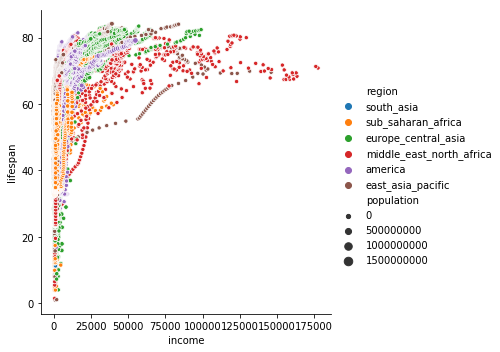

In [30]:
sns.relplot(x='income', y='lifespan', hue='region', size='population', data=merged);

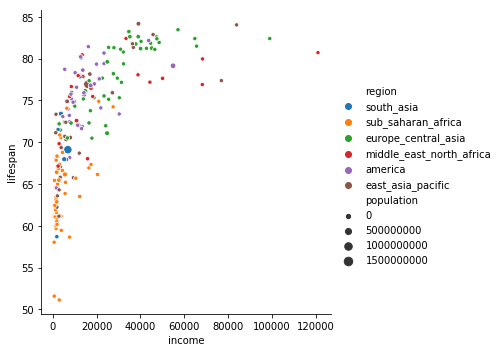

In [31]:
now = merged[merged['year'] == 2018]

sns.relplot(x='income', y='lifespan', hue='region', size='population', data=now);

In [32]:
qatar_now = now[(now['income'] > 80000) & (now['country'] == 'Qatar')].sort_values(by='income')
qatar_now

,year,income,lifespan,population,country,region
30362,2018,121033,80.71,2694849,Qatar,middle_east_north_africa


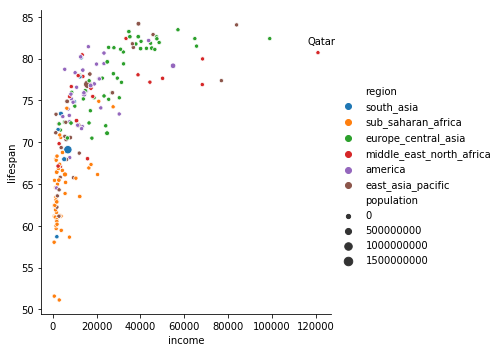

In [33]:
sns.relplot(x='income', y='lifespan', hue='region', size='population', data=now)
plt.text(x=qatar_now['income']-5000 , y=qatar_now['lifespan']+1 , s='Qatar');

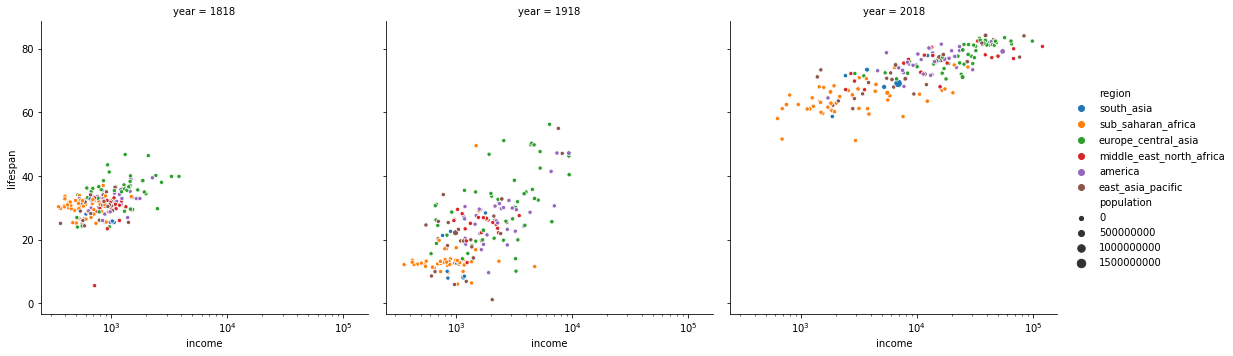

In [34]:
years = [1818, 1918, 2018]
centuries = merged[merged['year'].isin(years)]

sns.relplot(x='income', y='lifespan', hue='region', size='population', col='year', data=centuries)
plt.xscale('log')

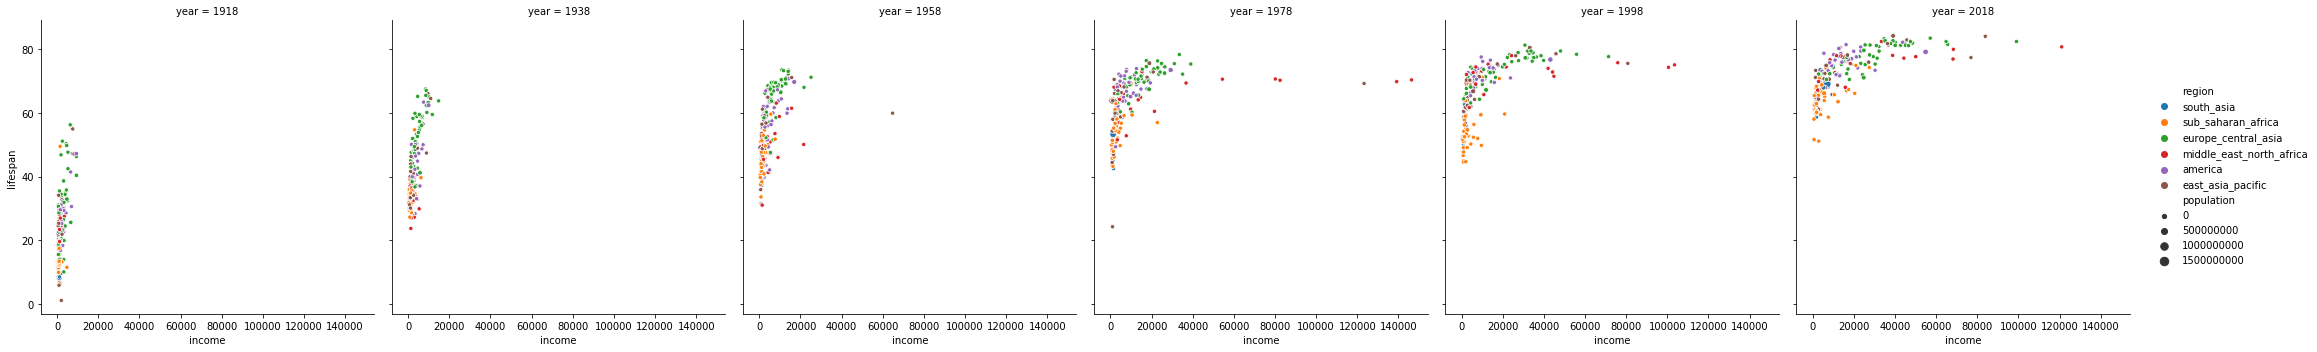

In [35]:
more_years = [1918, 1938, 1958, 1978, 1998, 2018]
decades = merged[merged['year'].isin(more_years)]

sns.relplot(x='income', y='lifespan', hue='region', size='population', col='year', data=decades);

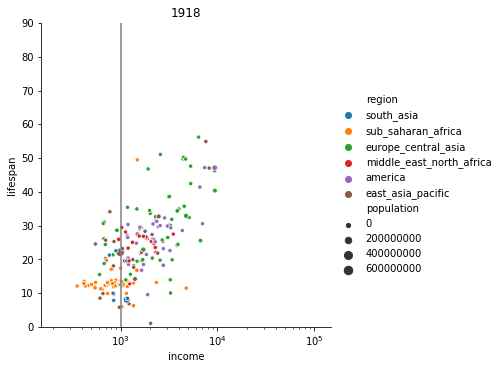

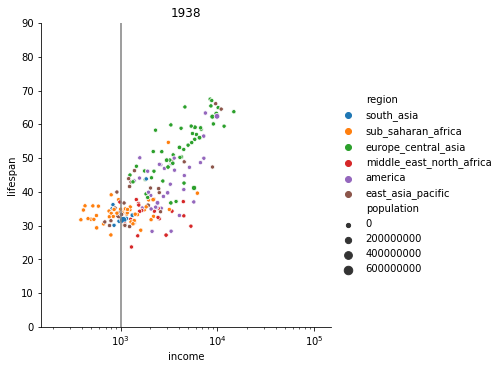

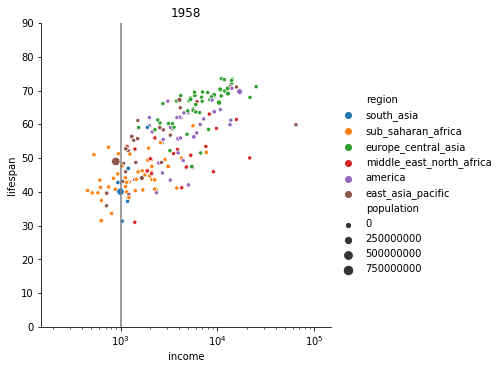

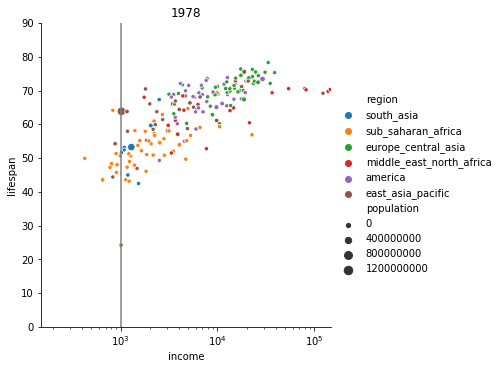

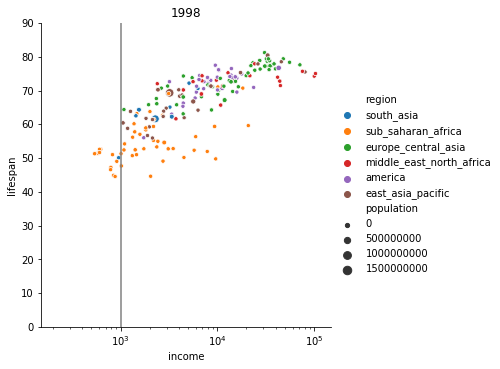

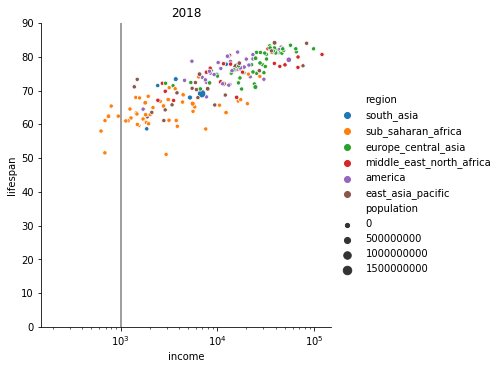

In [36]:
for year in more_years:
  sns.relplot(x='income', y='lifespan', hue='region', size='population',
              data=decades[decades['year'] == year])
  
  plt.xscale('log')
  plt.xlim(150, 150000)
  plt.ylim(0, 90)
  plt.title(year)
  plt.axvline(x=1000, color='grey')
  

In [37]:
merged[(merged.year==1918) & (merged.lifespan > 50)]

,year,income,lifespan,population,country,region
1698,1918,7610,54.95,5066003,Australia,east_asia_pacific
10067,1918,6393,56.24,3165276,Denmark,europe_central_asia
17513,1918,2576,51.11,115504,Iceland,europe_central_asia
27196,1918,4479,50.28,2576646,Norway,europe_central_asia


In [38]:
merged[(merged.year==2018) & (merged.lifespan < 50)]

,year,income,lifespan,population,country,region


## Analyze outliers

## Plot multiple years

## Point out a story

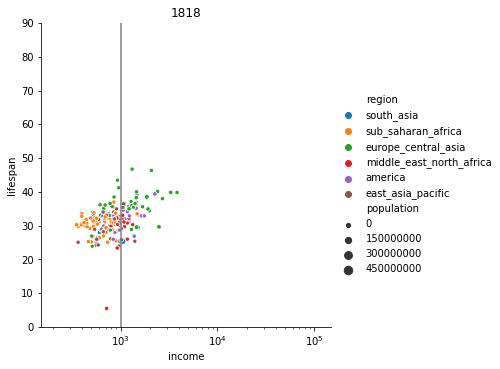

In [40]:

single_year = 1818 #@param {type: 'slider', min: 1800, max: 2018, step: 1}

sns.relplot(x='income', y='lifespan', hue='region', size='population',
              data=merged[merged['year'] == single_year])

plt.xscale('log')
plt.xlim(150, 150000)
plt.ylim(0, 90)
plt.title(single_year)
plt.axvline(x=1000, color='grey');

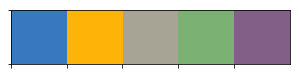

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

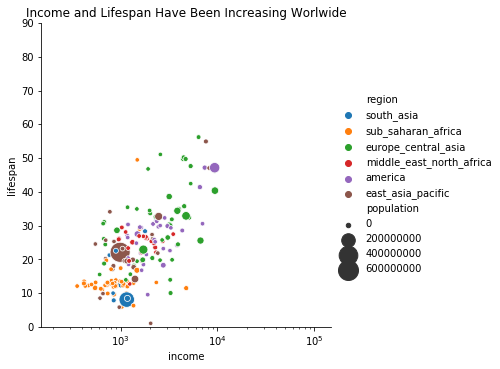

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

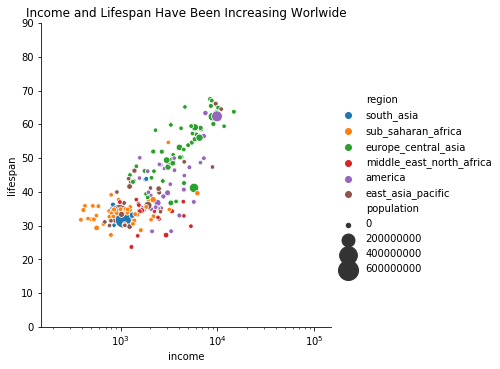

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

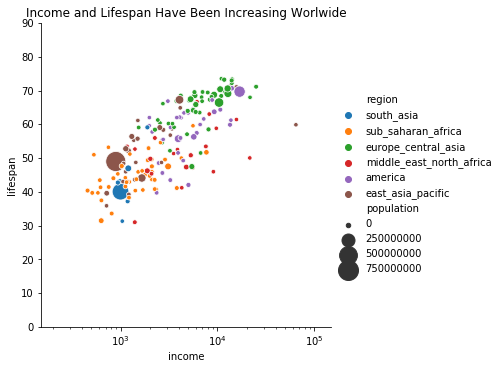

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

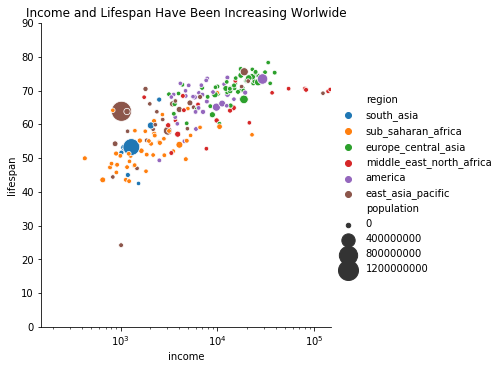

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

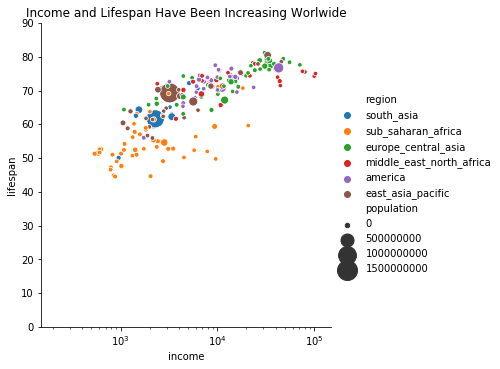

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

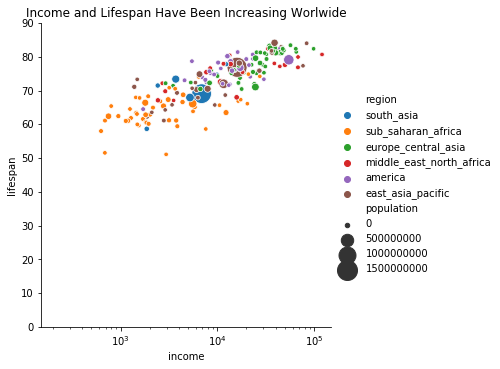

<IPython.core.display.Javascript object>

In [57]:
# Based on the example at: 
# https://colab.research.google.com/notebooks/widgets.ipynb#scrollTo=BZa2t-U5gIAB

colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.palplot(sns.xkcd_palette(colors));

from google.colab import widgets
tb = widgets.TabBar([str(year) for year in more_years])
for tab, year in zip(tb, more_years):
    sns.relplot(x='income', y='lifespan', hue='region', size='population', 
                sizes=(20, 400), data=merged[merged.year==year])

    plt.xscale('log')
    plt.xlim((150, 150000))
    plt.ylim((0, 90))
    plt.title('Income and Lifespan Have Been Increasing Worlwide');

In [58]:
!pip install plotly_express

     |████████████████████████████████| 6.8MB 4.8MB/s 
  Found existing installation: plotly 3.6.1
    Uninstalling plotly-3.6.1:
      Successfully uninstalled plotly-3.6.1


In [0]:
import plotly_express as px

In [67]:
every_10_years = range(1800, 2020, 10)
years_to_animate = merged[merged['year'].isin(every_10_years)]


px.scatter(years_to_animate, x="income", y="lifespan", animation_frame="year", animation_group="country",
           size="population", color="region", hover_name="country", 
           log_x = True, 
           size_max=45, range_x=[200,200000], range_y=[0,90],
           height=750,
           title='Income and Lifespan Have Been Increasing Worlwide')

# ASSIGNMENT
Replicate the lesson code

  - Improve the Gapminder graph that we made during lecture
  - Add a title and subtitle to the graph
  - (optional) see how the graph looks using the 4 regions rather than the 6.
  - (stretch) Small tick marks
  -  color hues

# STRETCH OPTIONS

## 1. Animate!
- [Making animations work in Google Colaboratory](https://medium.com/lambda-school-machine-learning/making-animations-work-in-google-colaboratory-new-home-for-ml-prototyping-c6147186ae75)
- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)

## 2. Work on anything related to your portfolio site / project